## 2 Model settings and statistical learning procedure
### 2.3 How to handle high volatility?

*Smoothing with moving average*

In [1]:
import os
os.chdir('../')
from inference_mahmm import *

import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
ν = np.array([.05, .9, 0.05])
Q = np.array([[0.8, 0.05, 0.15],[0.05, 0.8, 0.15],[0.025, 0.025, 0.95]])
M = np.array([-0.04, 0, 0.02])
Σ = np.ones(3) * 0.06
T, K = 1000, len(ν)

In [3]:
HMM = ma_hmm(ν, Q, M, Σ, T, 0)
HMM.simul(seed=121)
y = HMM.true_y[10:]
x = HMM.true_x[10:]

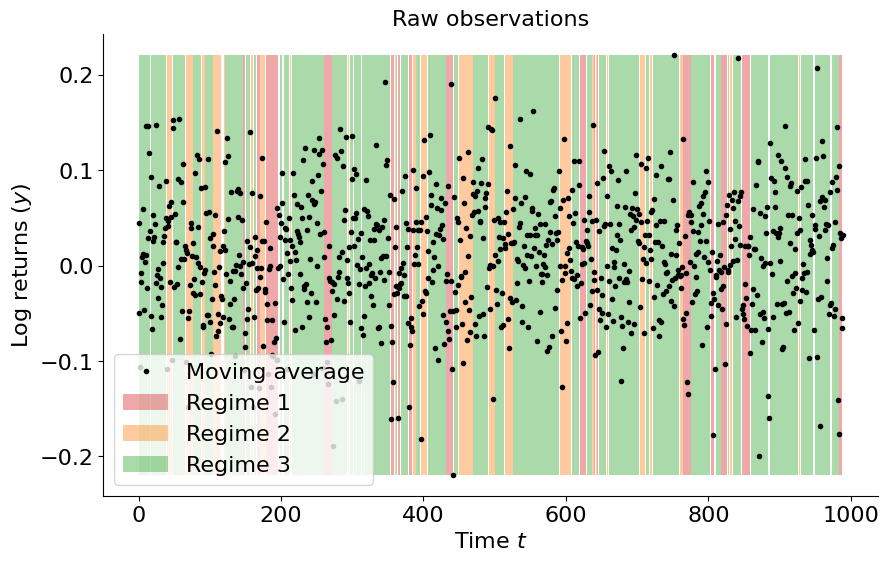

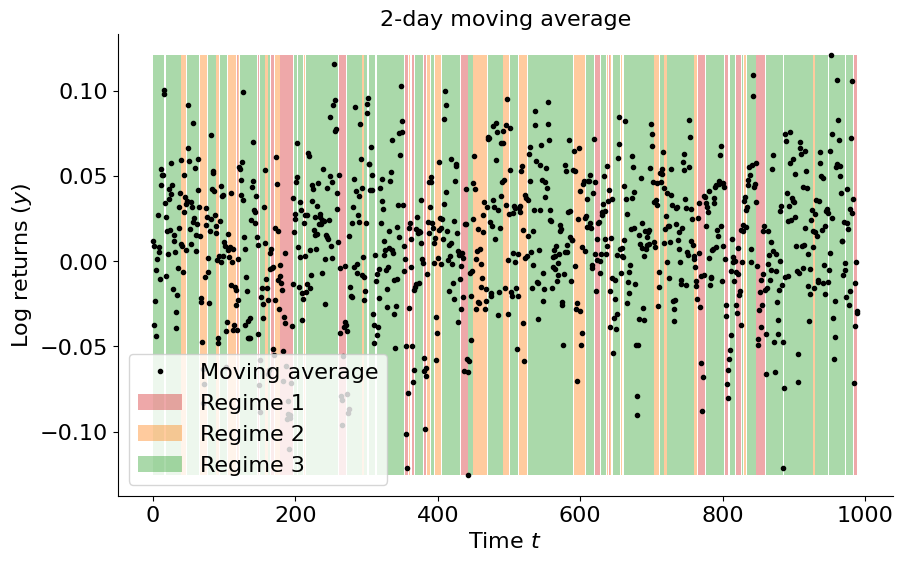

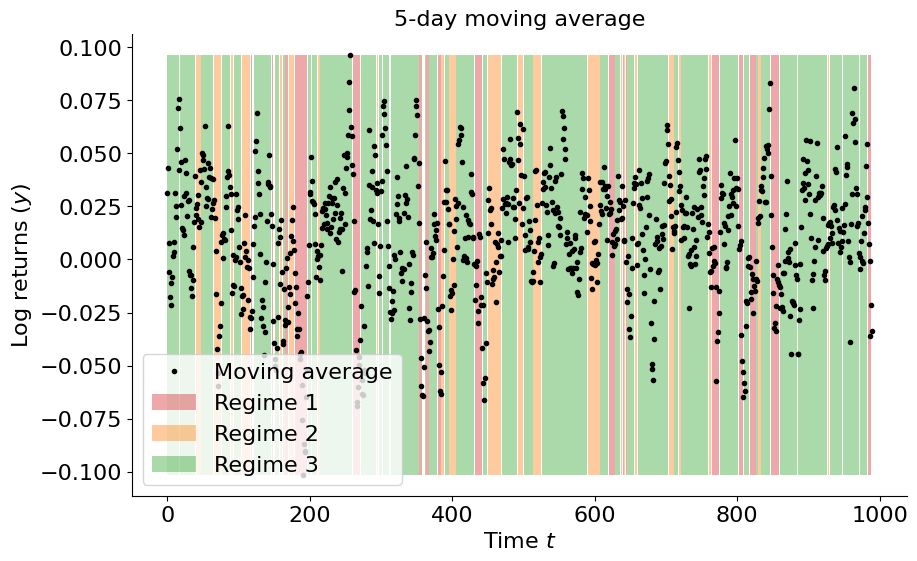

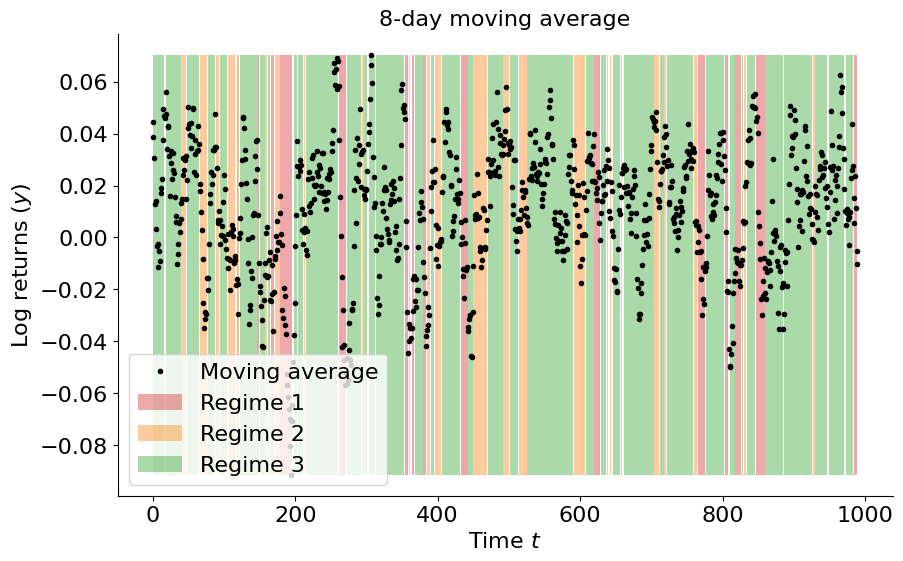

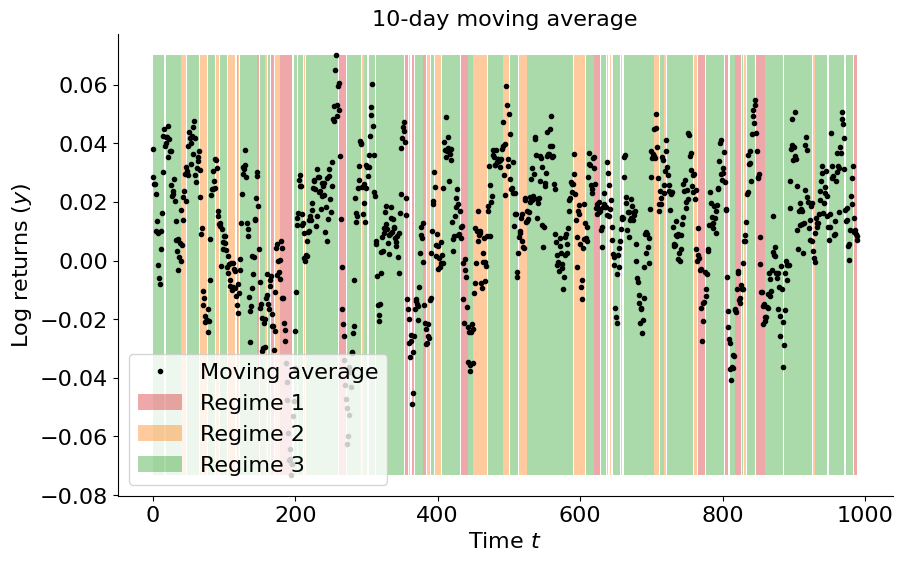

In [4]:
palette = ['tab:red', 'tab:orange', 'tab:green']

for N in [0, 2, 5, 8, 10]:
    z = moving_average(HMM.true_y, N)[-len(y):]
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(z, '.', color='black', label='Moving average')
    for i in np.unique(x):
        ax.fill_between(range(len(z)), np.min(z), np.max(z), where=(x==i), label='Regime ' + str(int(i+1)), color=palette[int(i)], alpha=.4, edgecolor=None)
    ax.set_xlabel('Time $t$', fontsize="16")
    ax.set_ylabel('Log returns ($y$)', fontsize="16")
    plt.yticks(fontsize="16")
    plt.xticks(fontsize="16")
    plt.legend(fontsize="16", loc=3)
    
    if N>0: plt.title(f'{N}-day moving average', fontsize=16) 
    else: plt.title('Raw observations', fontsize=16)
    
    sns.despine()
    plt.show()